In [1]:
# discriminate tumor vs normal 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import xgboost as xgb
import os

In [2]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
sns.set_theme(style="white")

#### https://developer.ibm.com/tutorials/awb-implementing-linear-discriminant-analysis-python/

In [4]:
os.listdir()

['image_processing.ipynb',
 'rna_seq_samples_details.csv',
 '06 013 CD31 - 2018-09-05 23.29.40.ndpi',
 'objects_7433_by_qupath.txt',
 '06_013_CD31_convoluted.jpg',
 '7433_2022_10_27.ndpi - Series 6NB.jpg',
 '14 008 CD31 - 2018-09-05 23.22.43.ndpi',
 '16 004 CD31 - 2018-09-05 23.38.36.ndpi',
 '7432_2022_10_27.ndpi',
 '7433_2022_10_27.ndpi',
 '7432_2022_10_27.ndpi - Series 7NB.jpg',
 '7436_2022_10_27.ndpi',
 '7434_2022_10_27.ndpi - Series 6NB.jpg',
 '16_004_CD31_convoluted.jpg',
 '14_008_CD31_convoluted.jpg',
 '7435_2022_10_27.ndpi',
 'tumor_normal_discriminate.ipynb',
 'Accessing_Ivy_Glioblastoma_Atlas_Project_Data.ipynb',
 '7435_2022_10_27.ndpi - Series 6NB.jpg',
 '7434_2022_10_27.ndpi',
 '.ipynb_checkpoints']

In [5]:
cells = pd.read_csv("objects_7433_by_qupath.txt", sep ="\t")

In [6]:
cells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Image                              29170 non-null  object 
 1   Object ID                          29170 non-null  object 
 2   Object type                        29170 non-null  object 
 3   Name                               0 non-null      float64
 4   Classification                     0 non-null      float64
 5   Parent                             29170 non-null  object 
 6   ROI                                29170 non-null  object 
 7   Centroid X µm                      29170 non-null  float64
 8   Centroid Y µm                      29170 non-null  float64
 9   Nucleus: Area                      29170 non-null  float64
 10  Nucleus: Perimeter                 29170 non-null  float64
 11  Nucleus: Circularity               29170 non-null  flo

In [7]:
cells_data = cells.iloc[:,9:50]

In [8]:
cells_data.head()

,Nucleus: Area,Nucleus: Perimeter,Nucleus: Circularity,Nucleus: Max caliper,Nucleus: Min caliper,Nucleus: Eccentricity,Nucleus: Hematoxylin OD mean,Nucleus: Hematoxylin OD sum,Nucleus: Hematoxylin OD std dev,Nucleus: Hematoxylin OD max,...,Cell: DAB OD min,Cytoplasm: Hematoxylin OD mean,Cytoplasm: Hematoxylin OD std dev,Cytoplasm: Hematoxylin OD max,Cytoplasm: Hematoxylin OD min,Cytoplasm: DAB OD mean,Cytoplasm: DAB OD std dev,Cytoplasm: DAB OD max,Cytoplasm: DAB OD min,Nucleus/Cell area ratio
0,16.25,14.9107,0.9185,5.1436,4.3374,0.4607,0.4335,29.4777,0.1109,0.6933,...,0.0125,0.1362,0.1282,0.8591,-0.0346,0.1002,0.0318,0.1961,0.0125,0.1050
1,12.50,13.0388,0.9239,4.4696,3.7195,0.4177,0.4935,27.1441,0.1299,0.7598,...,0.0159,0.1510,0.1234,0.5110,-0.0143,0.1102,0.0302,0.2034,0.0199,0.1400
2,26.00,23.6091,0.5862,10.1956,3.7911,0.9410,0.2475,27.2301,0.0635,0.3817,...,0.0359,0.0742,0.0420,0.2478,-0.0145,0.1206,0.0382,0.2678,0.0359,0.1329
3,26.00,19.9050,0.8246,7.5556,4.9756,0.7435,0.5617,58.9748,0.1495,0.8860,...,0.0351,0.1103,0.0762,0.3973,-0.0345,0.1164,0.0340,0.2149,0.0351,0.2363
4,28.75,20.0851,0.8956,7.6787,4.6948,0.7783,0.5216,62.0704,0.1675,1.1309,...,-0.0129,0.1264,0.1184,0.5625,-0.0128,0.0996,0.0338,0.2255,0.0082,0.2164


In [9]:
cells_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nucleus: Area                      29170 non-null  float64
 1   Nucleus: Perimeter                 29170 non-null  float64
 2   Nucleus: Circularity               29170 non-null  float64
 3   Nucleus: Max caliper               29170 non-null  float64
 4   Nucleus: Min caliper               29170 non-null  float64
 5   Nucleus: Eccentricity              29170 non-null  float64
 6   Nucleus: Hematoxylin OD mean       29170 non-null  float64
 7   Nucleus: Hematoxylin OD sum        29170 non-null  float64
 8   Nucleus: Hematoxylin OD std dev    29170 non-null  float64
 9   Nucleus: Hematoxylin OD max        29170 non-null  float64
 10  Nucleus: Hematoxylin OD min        29170 non-null  float64
 11  Nucleus: Hematoxylin OD range      29170 non-null  flo

In [10]:
sample = cells_data.sample(n=1000)

### nucleus hematoxylin

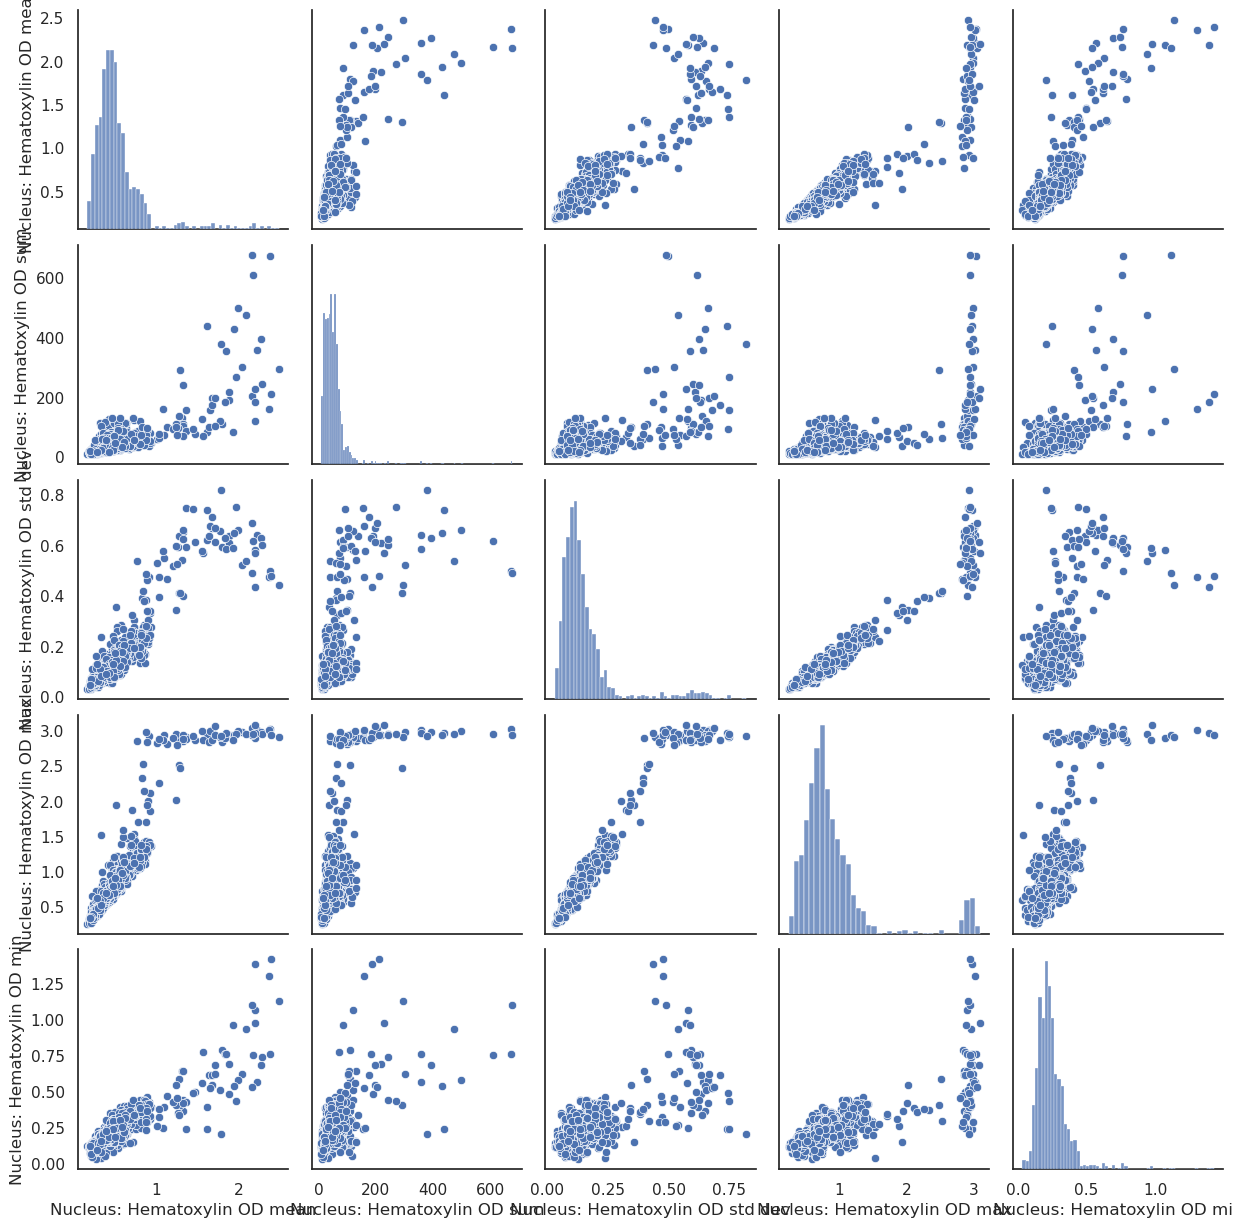

In [11]:
sns.pairplot(sample.iloc[:,6:11])

### nucleus physical features

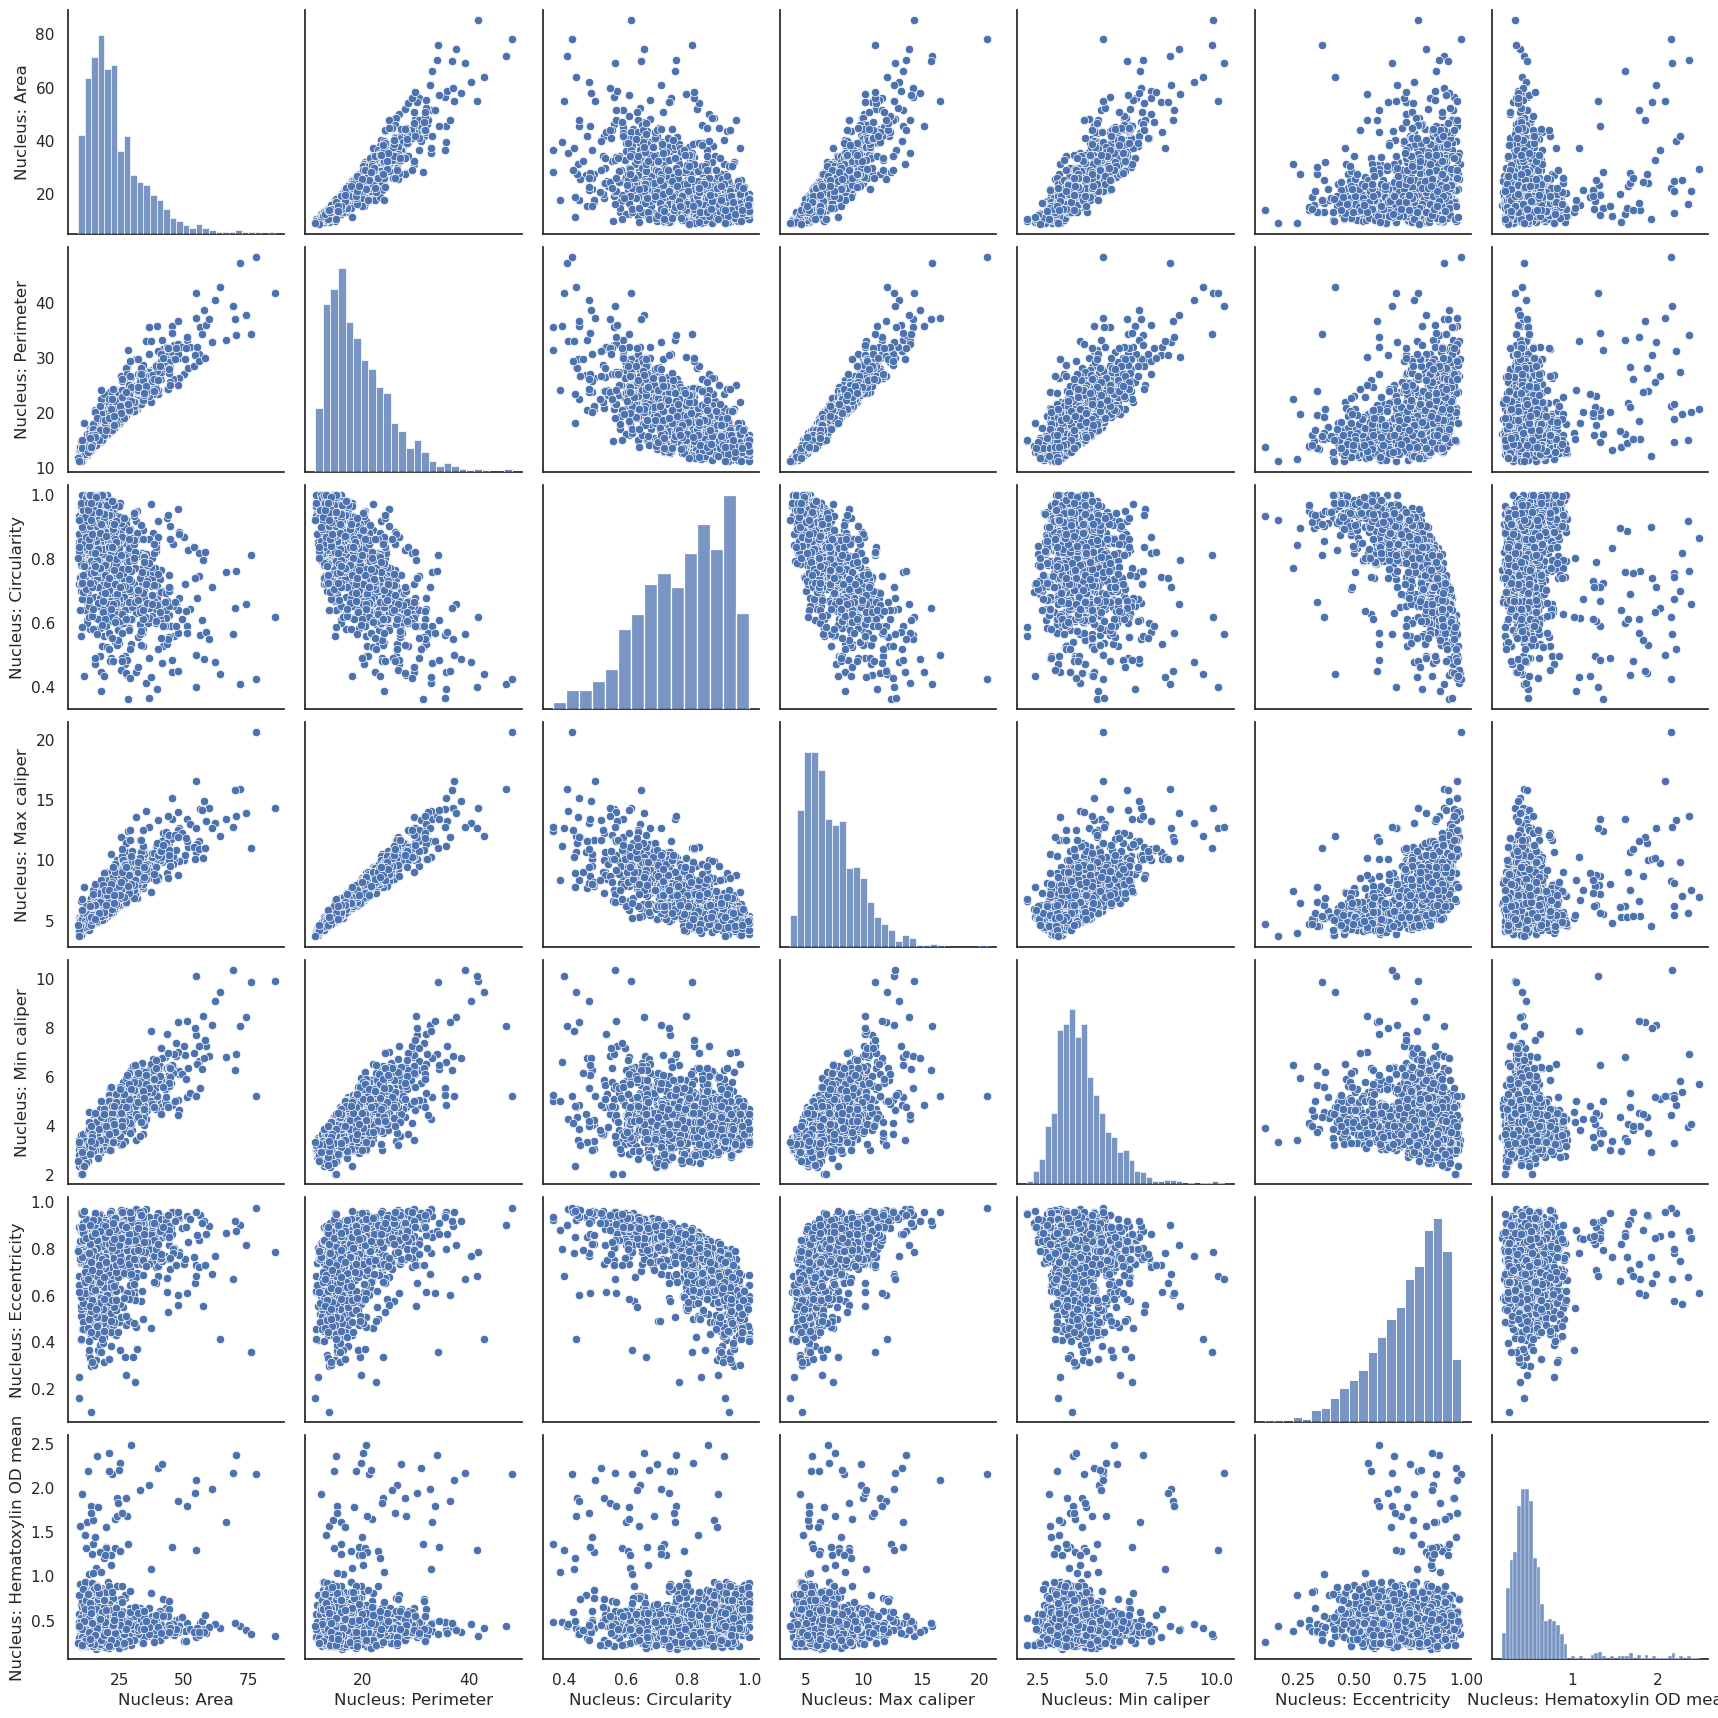

In [12]:
sns.pairplot(sample.iloc[:,0:7])

### cell hematoxylin

In [13]:
cells_data.loc[:,['Nucleus/Cell area ratio']].describe()

,Nucleus/Cell area ratio
count,29170.000000
mean,0.265510
std,0.086264
min,0.073000
25%,0.199800
50%,0.258900
75%,0.325000
max,0.644700


### correlation plot

<Axes: >

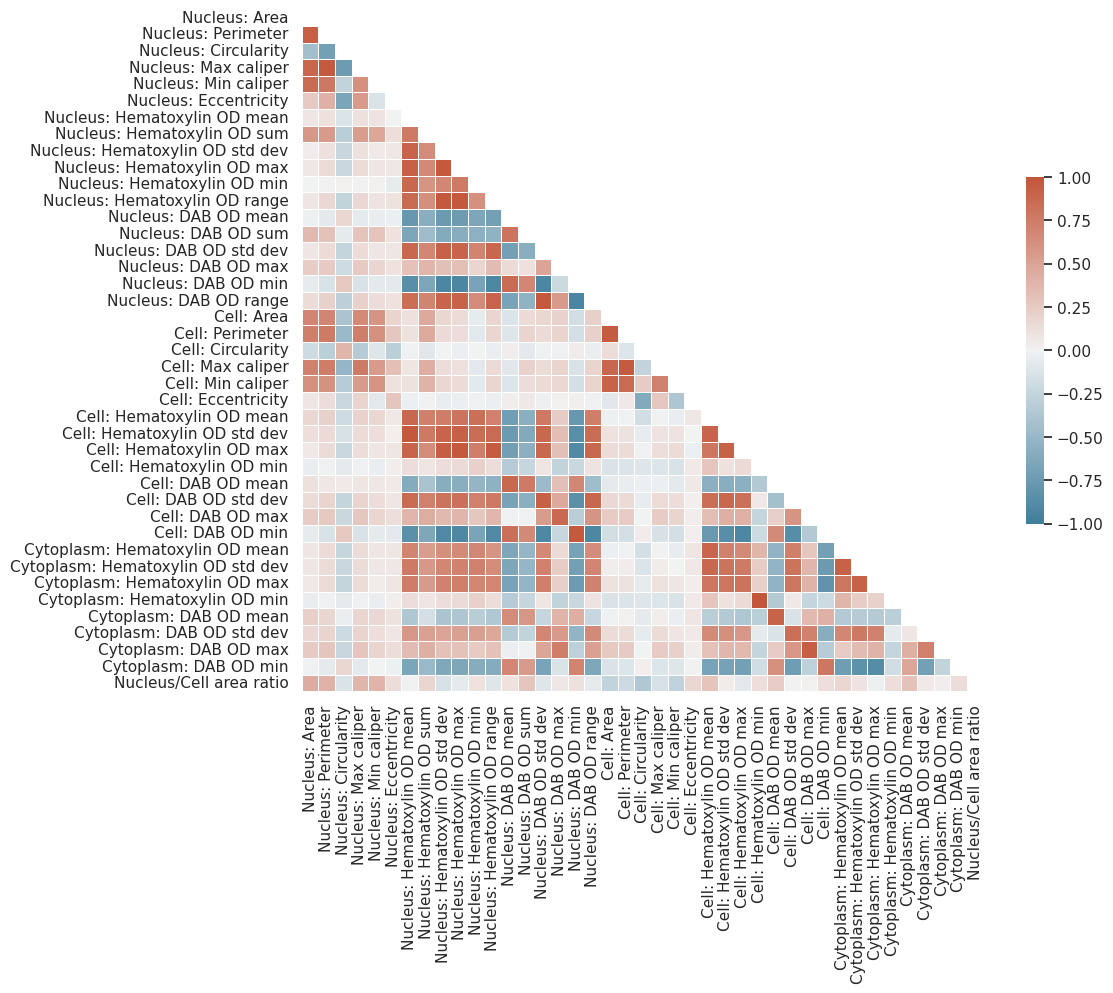

In [14]:
# Compute the correlation matrix
corr = sample.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
sample.loc[:,['Nucleus: Hematoxylin OD mean','Cell: DAB OD mean']].corr()

,Nucleus: Hematoxylin OD mean,Cell: DAB OD mean
Nucleus: Hematoxylin OD mean,1.000000,-0.605498
Cell: DAB OD mean,-0.605498,1.000000


In [16]:
sample['Nucleus: Hematoxylin OD mean'] = pd.Series(sample['Nucleus: Hematoxylin OD mean']).map(lambda x:np.log(x))

In [17]:
sample.head()

,Nucleus: Area,Nucleus: Perimeter,Nucleus: Circularity,Nucleus: Max caliper,Nucleus: Min caliper,Nucleus: Eccentricity,Nucleus: Hematoxylin OD mean,Nucleus: Hematoxylin OD sum,Nucleus: Hematoxylin OD std dev,Nucleus: Hematoxylin OD max,...,Cell: DAB OD min,Cytoplasm: Hematoxylin OD mean,Cytoplasm: Hematoxylin OD std dev,Cytoplasm: Hematoxylin OD max,Cytoplasm: Hematoxylin OD min,Cytoplasm: DAB OD mean,Cytoplasm: DAB OD std dev,Cytoplasm: DAB OD max,Cytoplasm: DAB OD min,Nucleus/Cell area ratio
2146,17.50,16.0416,0.8546,6.3454,3.6869,0.8279,-0.839561,31.1001,0.1017,0.6547,...,0.0351,0.0779,0.0587,0.5247,0.0052,0.0872,0.0187,0.1605,0.0357,0.2498
11586,18.50,17.1599,0.7895,6.5532,4.1408,0.8004,-0.802293,34.9698,0.1585,0.8890,...,0.0318,0.1008,0.0789,0.4276,0.0023,0.1134,0.0269,0.2085,0.0459,0.1935
10134,13.25,13.2303,0.9512,4.9241,3.5234,0.6209,-0.912299,22.4922,0.1216,0.6381,...,0.0330,0.0683,0.0290,0.2102,0.0217,0.0938,0.0215,0.1768,0.0330,0.1390
16713,25.25,22.2337,0.6419,9.4560,3.8946,0.9199,-0.621571,56.9364,0.1331,0.8731,...,0.0619,0.0927,0.0811,0.5290,0.0158,0.1462,0.0385,0.2711,0.0619,0.3328
23712,10.00,11.9808,0.8755,4.3220,2.8285,0.7518,-0.965481,16.7538,0.1208,0.6490,...,0.0411,0.0675,0.0474,0.2630,0.0103,0.0928,0.0294,0.2299,0.0411,0.1230


In [18]:
df1 = sample.loc[:,['Nucleus: Hematoxylin OD mean','Nucleus: Area']]  
df2 = sample.loc[:,['Nucleus: Hematoxylin OD mean','Nucleus: Perimeter']]  
df3 = sample.loc[:,['Nucleus: Hematoxylin OD mean','Nucleus: Circularity']]         
df4 = sample.loc[:,['Nucleus: Hematoxylin OD mean','Nucleus: Max caliper']]            
df5 = sample.loc[:,['Nucleus: Hematoxylin OD mean','Nucleus: Min caliper']]     
df6 = sample.loc[:,['Nucleus: Hematoxylin OD mean','Nucleus: Eccentricity']] 
df_list = [df1,df2,df3,df4,df5,df6]

In [19]:
df6.iloc[:,1].head()

2146     0.8279
11586    0.8004
10134    0.6209
16713    0.9199
23712    0.7518
Name: Nucleus: Eccentricity, dtype: float64

### physical features with hematoxylin

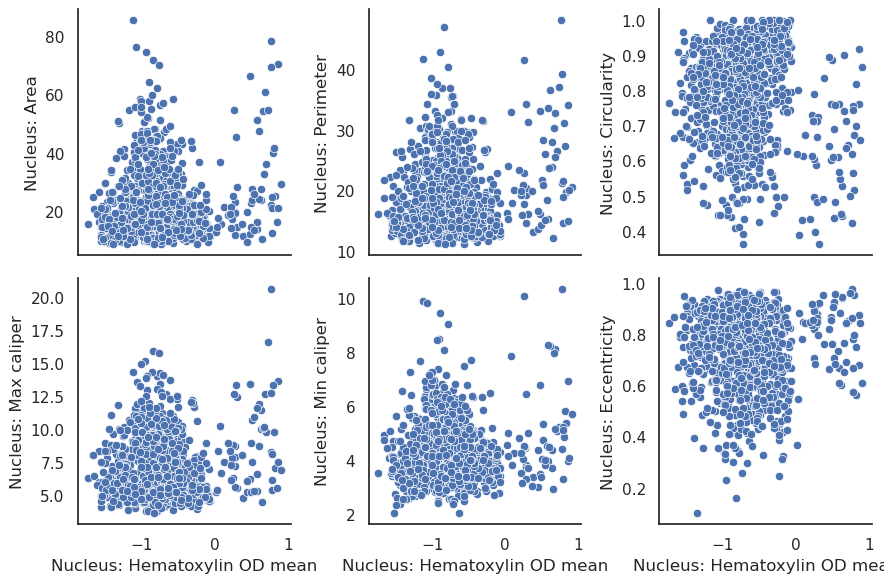

In [20]:
# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6]
y_list = ['Nucleus: Area','Nucleus: Perimeter','Nucleus: Circularity','Nucleus: Max caliper','Nucleus: Min caliper','Nucleus: Eccentricity']
nrow = 2
ncol = 3
# create the figure and axes
fig, axes = plt.subplots(nrow, ncol, figsize=(9, 6), sharex=True, tight_layout=True)
# convert to 1D array for easy iteration
axes = axes.flat

# iterate through dictionary and plot
count = 0
for ax,df in zip(axes,df_list) :
    sns.scatterplot(data=df,x='Nucleus: Hematoxylin OD mean', y=y_list[count], ax=ax)
    sns.despine(top=True, right=True)
    count = count+1


In [21]:
for i in axes:
    print(i)

### physical features with nuclues/cytoplasm ratio

In [22]:
df7 = sample.loc[:,['Nucleus/Cell area ratio','Nucleus: Area']]  
df8 = sample.loc[:,['Nucleus/Cell area ratio','Nucleus: Perimeter']]  
df9 = sample.loc[:,['Nucleus/Cell area ratio','Nucleus: Circularity']]         
df10 = sample.loc[:,['Nucleus/Cell area ratio','Nucleus: Max caliper']]            
df11 = sample.loc[:,['Nucleus/Cell area ratio','Nucleus: Min caliper']]     
df12 = sample.loc[:,['Nucleus/Cell area ratio','Nucleus: Eccentricity']] 
df_list = [df7,df8,df9,df10,df11,df12]

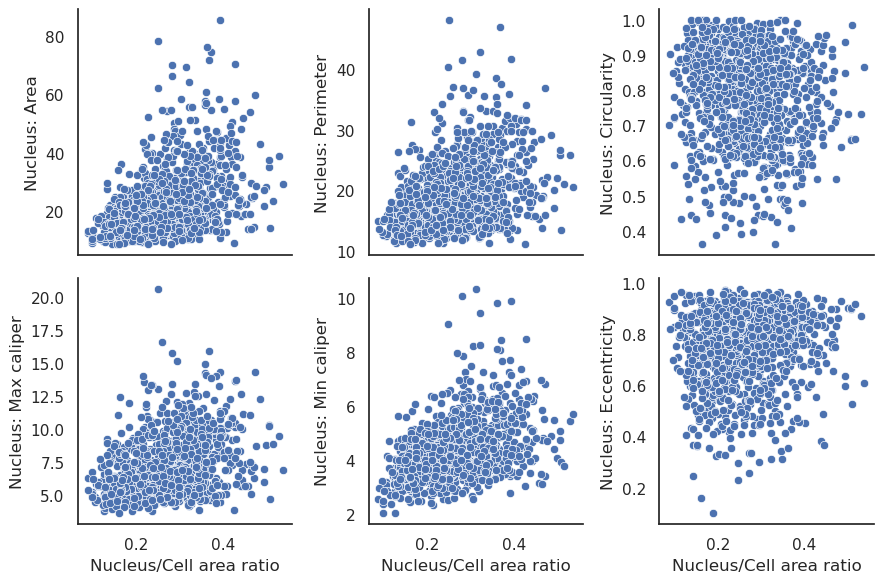

In [23]:
# make a list of all dataframes 
df_list = [df7,df8,df9,df10,df11,df12]
y_list = ['Nucleus: Area','Nucleus: Perimeter','Nucleus: Circularity','Nucleus: Max caliper','Nucleus: Min caliper','Nucleus: Eccentricity']
nrow = 2
ncol = 3
# create the figure and axes
fig, axes = plt.subplots(nrow, ncol, figsize=(9, 6), sharex=True, tight_layout=True)
# convert to 1D array for easy iteration
axes = axes.flat

# iterate through dictionary and plot
count = 0
for ax,df in zip(axes,df_list) :
    sns.scatterplot(data=df,x='Nucleus/Cell area ratio', y=y_list[count], ax=ax)
    sns.despine(top=True, right=True)
    count = count+1

In [24]:
sample.loc[:,['Nucleus: Hematoxylin OD mean','Nucleus/Cell area ratio','Nucleus: Eccentricity']].corr()

,Nucleus: Hematoxylin OD mean,Nucleus/Cell area ratio,Nucleus: Eccentricity
Nucleus: Hematoxylin OD mean,1.000000,0.030509,-0.028181
Nucleus/Cell area ratio,0.030509,1.000000,0.131678
Nucleus: Eccentricity,-0.028181,0.131678,1.000000


### clustering to distinguish 2 nucleus types
#### The idea is that if we can distinguish 2 cell types using an unbiased classifier and if these 2 nucleus types match with actual tumor vs normal, then we can use this to decide margins of the tumor mass
#### https://machinelearningmastery.com/clustering-algorithms-with-python/

In [10]:
sample = cells.sample(n=1000)

In [26]:
sample.columns

Index(['Image', 'Object ID', 'Object type', 'Name', 'Classification', 'Parent',
       'ROI', 'Centroid X µm', 'Centroid Y µm', 'Nucleus: Area',
       'Nucleus: Perimeter', 'Nucleus: Circularity', 'Nucleus: Max caliper',
       'Nucleus: Min caliper', 'Nucleus: Eccentricity',
       'Nucleus: Hematoxylin OD mean', 'Nucleus: Hematoxylin OD sum',
       'Nucleus: Hematoxylin OD std dev', 'Nucleus: Hematoxylin OD max',
       'Nucleus: Hematoxylin OD min', 'Nucleus: Hematoxylin OD range',
       'Nucleus: DAB OD mean', 'Nucleus: DAB OD sum',
       'Nucleus: DAB OD std dev', 'Nucleus: DAB OD max', 'Nucleus: DAB OD min',
       'Nucleus: DAB OD range', 'Cell: Area', 'Cell: Perimeter',
       'Cell: Circularity', 'Cell: Max caliper', 'Cell: Min caliper',
       'Cell: Eccentricity', 'Cell: Hematoxylin OD mean',
       'Cell: Hematoxylin OD std dev', 'Cell: Hematoxylin OD max',
       'Cell: Hematoxylin OD min', 'Cell: DAB OD mean', 'Cell: DAB OD std dev',
       'Cell: DAB OD max', 'Cell: 

In [11]:
sample.set_index('Object ID', inplace=True)

In [12]:
sample = sample[['Nucleus: Area','Nucleus: Circularity','Nucleus: Eccentricity','Nucleus: Hematoxylin OD mean']]

In [13]:
sample.head()

,Nucleus: Area,Nucleus: Circularity,Nucleus: Eccentricity,Nucleus: Hematoxylin OD mean
Object ID,,,,
1037bce6-cc21-4f1e-b279-039636d1f719,59.00,0.8822,0.6543,0.3420
62be46b2-4735-46af-83ec-6675fdb32915,25.50,0.8478,0.6680,0.3866
fac9e9bd-7b6d-4733-b6e6-af493cc5bfb0,14.25,0.7717,0.7844,0.4766
803eb101-703a-4042-bd35-637cbcda50d1,33.50,0.5673,0.8576,0.3723
d0a956d9-3e3c-4179-b690-85c40c0723cc,43.25,0.5243,0.5847,0.4902


#### affinity propogation

In [14]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation

In [63]:
sample.iloc[:3,3]

Object ID
33f88e7c-030a-4693-a9d9-c5c10e670e59    0.3959
2ee1617c-fa5a-4c56-9ef3-7aa00a26627a    0.5338
4b6d98b4-2352-47a3-8571-57b059094222    0.7859
Name: Nucleus: Hematoxylin OD mean, dtype: float64

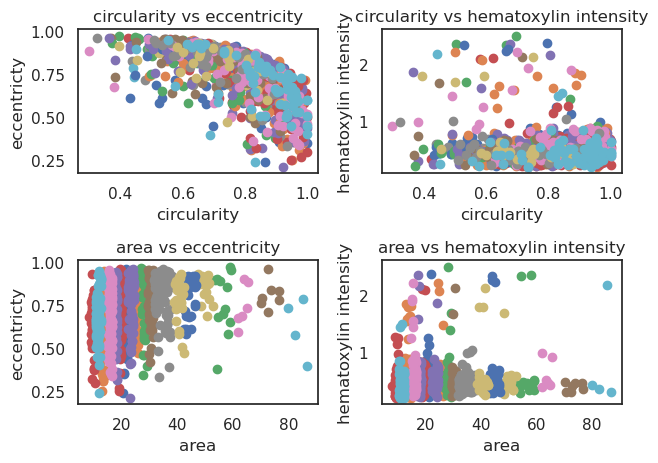

In [67]:
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(sample)
# assign a cluster to each example
yhat = model.predict(sample)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
fig, axes = plt.subplots(2, 2)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    axes[0,0].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 2])
    axes[0, 0].set_title('circularity vs eccentricity')
    axes[0,0].set(xlabel="circularity", ylabel="eccentricty")
    
    axes[0,1].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 3])
    axes[0, 1].set_title('circularity vs hematoxylin intensity')
    axes[0,1].set(xlabel="circularity", ylabel="hematoxylin intensity")
    
    axes[1,0].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 2])
    axes[1, 0].set_title('area vs eccentricity')
    axes[1,0].set(xlabel="area", ylabel="eccentricty")
    
    axes[1,1].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 3])
    axes[1, 1].set_title('area vs hematoxylin intensity')
    axes[1,1].set(xlabel="area", ylabel="hematoxylin intensity")
    # show the plot
fig.tight_layout()
plt.show()

#### agglomerative clustering

In [69]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

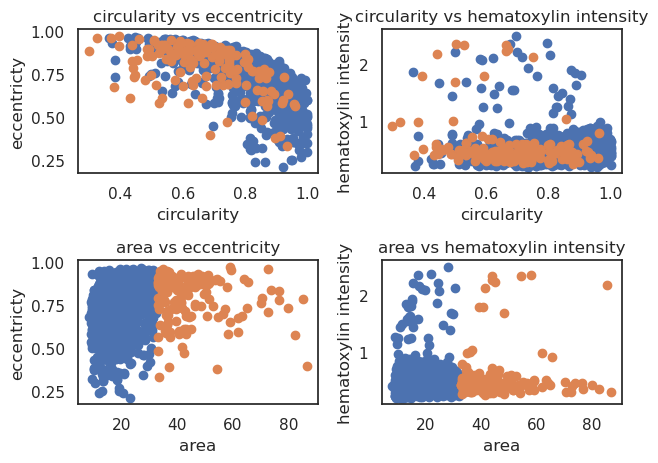

In [70]:
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(sample)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
fig, axes = plt.subplots(2, 2)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    axes[0,0].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 2])
    axes[0, 0].set_title('circularity vs eccentricity')
    axes[0,0].set(xlabel="circularity", ylabel="eccentricty")
    
    axes[0,1].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 3])
    axes[0, 1].set_title('circularity vs hematoxylin intensity')
    axes[0,1].set(xlabel="circularity", ylabel="hematoxylin intensity")
    
    axes[1,0].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 2])
    axes[1, 0].set_title('area vs eccentricity')
    axes[1,0].set(xlabel="area", ylabel="eccentricty")
    
    axes[1,1].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 3])
    axes[1, 1].set_title('area vs hematoxylin intensity')
    axes[1,1].set(xlabel="area", ylabel="hematoxylin intensity")
# show the plot
fig.tight_layout()
plt.show()


#### BIRCH

In [71]:
# birch clustering
from sklearn.cluster import Birch

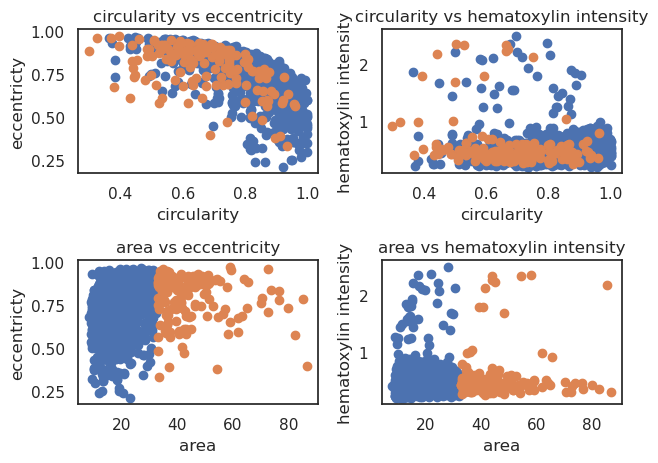

In [72]:
# define the model
model_b = Birch(threshold=0.01, n_clusters=2)
# fit the model
model_b.fit(sample)
# assign a cluster to each example
yhat = model_b.predict(sample)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
fig, axes = plt.subplots(2, 2)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    axes[0,0].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 2])
    axes[0, 0].set_title('circularity vs eccentricity')
    axes[0,0].set(xlabel="circularity", ylabel="eccentricty")
    
    axes[0,1].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 3])
    axes[0, 1].set_title('circularity vs hematoxylin intensity')
    axes[0,1].set(xlabel="circularity", ylabel="hematoxylin intensity")
    
    axes[1,0].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 2])
    axes[1, 0].set_title('area vs eccentricity')
    axes[1,0].set(xlabel="area", ylabel="eccentricty")
    
    axes[1,1].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 3])
    axes[1, 1].set_title('area vs hematoxylin intensity')
    axes[1,1].set(xlabel="area", ylabel="hematoxylin intensity")
# show the plot
fig.tight_layout()
plt.show()

#### DBSCAN

In [73]:
# dbscan clustering
from sklearn.cluster import DBSCAN

In [74]:
# define the model
model = DBSCAN(eps=0.50, min_samples=40)
# fit model and predict clusters
yhat = model.fit_predict(sample)
# retrieve unique clusters
clusters = unique(yhat)

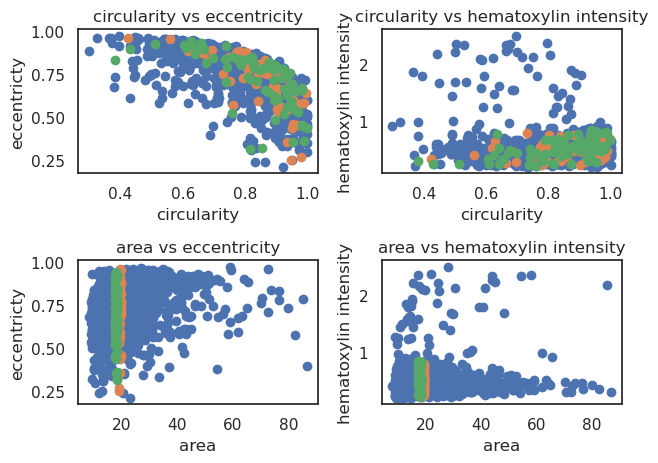

In [75]:
# create scatter plot for samples from each cluster
fig, axes = plt.subplots(2, 2)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    axes[0,0].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 2])
    axes[0, 0].set_title('circularity vs eccentricity')
    axes[0,0].set(xlabel="circularity", ylabel="eccentricty")
    
    axes[0,1].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 3])
    axes[0, 1].set_title('circularity vs hematoxylin intensity')
    axes[0,1].set(xlabel="circularity", ylabel="hematoxylin intensity")
    
    axes[1,0].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 2])
    axes[1, 0].set_title('area vs eccentricity')
    axes[1,0].set(xlabel="area", ylabel="eccentricty")
    
    axes[1,1].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 3])
    axes[1, 1].set_title('area vs hematoxylin intensity')
    axes[1,1].set(xlabel="area", ylabel="hematoxylin intensity")
# show the plot
fig.tight_layout()
plt.show()

#### K-means

In [59]:
# k-means clustering
from sklearn.cluster import KMeans

In [61]:
model = KMeans(n_clusters=2)
# fit the model
model.fit(sample)
# assign a cluster to each example
yhat = model.predict(sample)
# retrieve unique clusters
clusters = unique(yhat)

/opt/gridware/depots/996bcebb/el7/pkg/apps/anaconda3/2023.03/bin/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


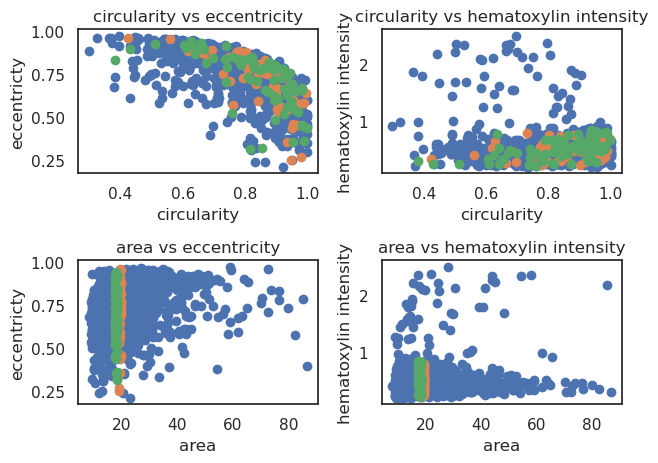

In [76]:
# create scatter plot for samples from each cluster
fig, axes = plt.subplots(2, 2)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    axes[0,0].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 2])
    axes[0, 0].set_title('circularity vs eccentricity')
    axes[0,0].set(xlabel="circularity", ylabel="eccentricty")
    
    axes[0,1].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 3])
    axes[0, 1].set_title('circularity vs hematoxylin intensity')
    axes[0,1].set(xlabel="circularity", ylabel="hematoxylin intensity")
    
    axes[1,0].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 2])
    axes[1, 0].set_title('area vs eccentricity')
    axes[1,0].set(xlabel="area", ylabel="eccentricty")
    
    axes[1,1].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 3])
    axes[1, 1].set_title('area vs hematoxylin intensity')
    axes[1,1].set(xlabel="area", ylabel="hematoxylin intensity")
# show the plot
fig.tight_layout()
plt.show()

#### Gaussian mixture model

In [77]:
# gaussian mixture clustering
from sklearn.mixture import GaussianMixture

In [78]:
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(sample)
# assign a cluster to each example
yhat = model.predict(sample)
# retrieve unique clusters
clusters = unique(yhat)

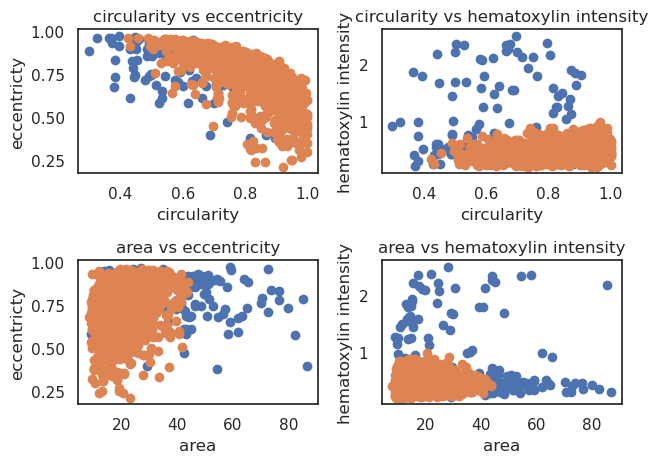

In [79]:
# create scatter plot for samples from each cluster
fig, axes = plt.subplots(2, 2)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    axes[0,0].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 2])
    axes[0, 0].set_title('circularity vs eccentricity')
    axes[0,0].set(xlabel="circularity", ylabel="eccentricty")
    
    axes[0,1].scatter(sample.iloc[row_ix[0], 1], sample.iloc[row_ix[0], 3])
    axes[0, 1].set_title('circularity vs hematoxylin intensity')
    axes[0,1].set(xlabel="circularity", ylabel="hematoxylin intensity")
    
    axes[1,0].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 2])
    axes[1, 0].set_title('area vs eccentricity')
    axes[1,0].set(xlabel="area", ylabel="eccentricty")
    
    axes[1,1].scatter(sample.iloc[row_ix[0], 0], sample.iloc[row_ix[0], 3])
    axes[1, 1].set_title('area vs hematoxylin intensity')
    axes[1,1].set(xlabel="area", ylabel="hematoxylin intensity")
# show the plot
fig.tight_layout()
plt.show()